In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

# reading features list 
with open("./dataset/kddcup.names", 'r') as f: 
	print(f.read()) 


back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
 
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""

columns =[] 
for c in cols.split(', '): 
	if(c.strip()): 
	 columns.append(c.strip()) 

columns.append('target') 
print(len(columns)) 


42


In [3]:
 
with open("./dataset/training_attack_types", 'r') as f: 
	print(f.read()) 


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:
 
attacks_types = { 
'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 


In [5]:
path = "./dataset/kddcup.data_10_percent.gz"
df = pd.read_csv(path, names = columns) 

# Adding Attack Type column 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]]) 
df.head() 



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
 
df.shape 


(494021, 43)

In [7]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
# Finding categorical features 
num_cols = df._get_numeric_data().columns 

cate_cols = list(set(df.columns)-set(num_cols)) 
cate_cols.remove('target') 
cate_cols.remove('Attack Type') 

cate_cols 



['flag', 'protocol_type', 'service']

In [9]:
 

df.columns



Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

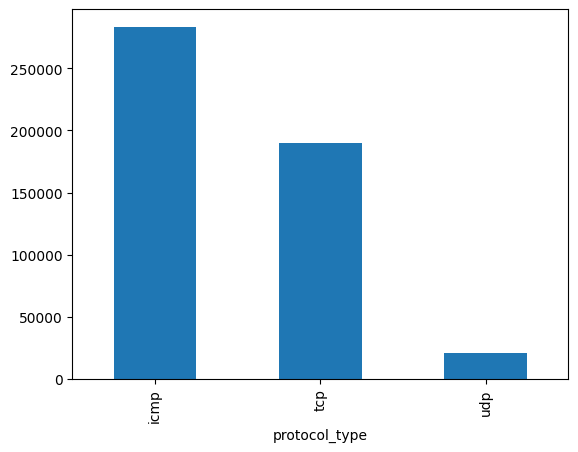

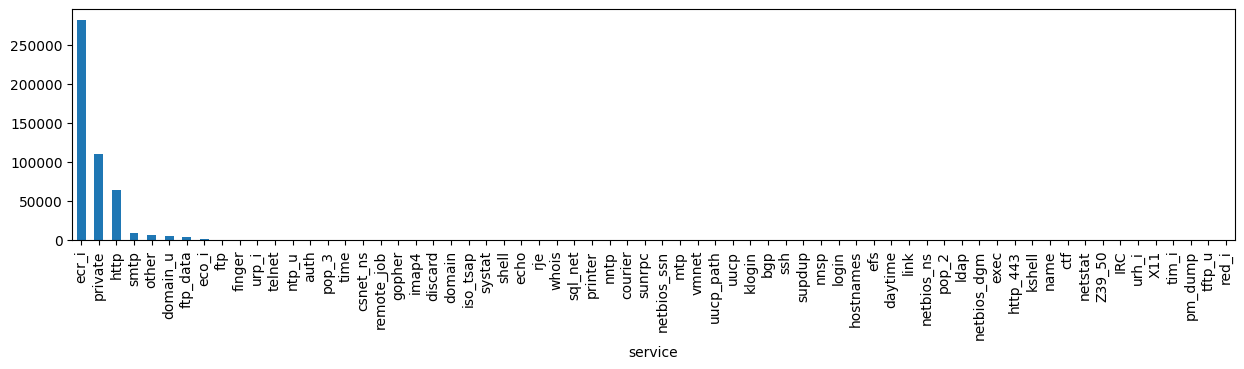

In [10]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

bar_graph('protocol_type')
plt.figure(figsize=(15,3))
bar_graph('service')

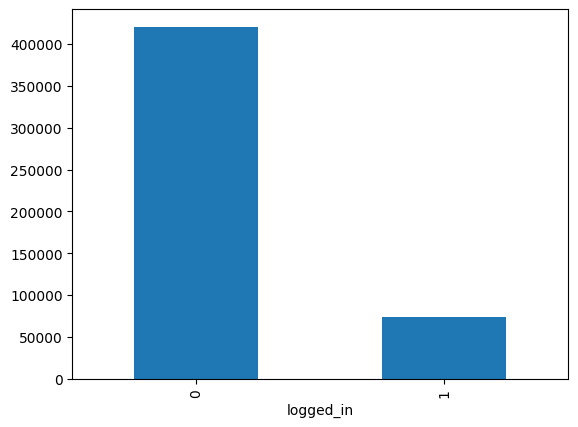

In [11]:

bar_graph('logged_in')


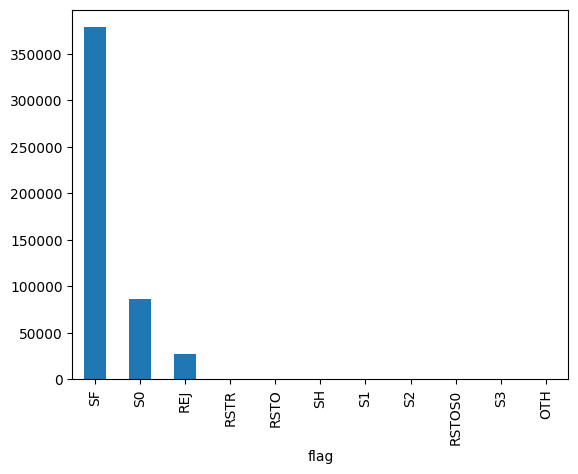

In [12]:
bar_graph('flag')

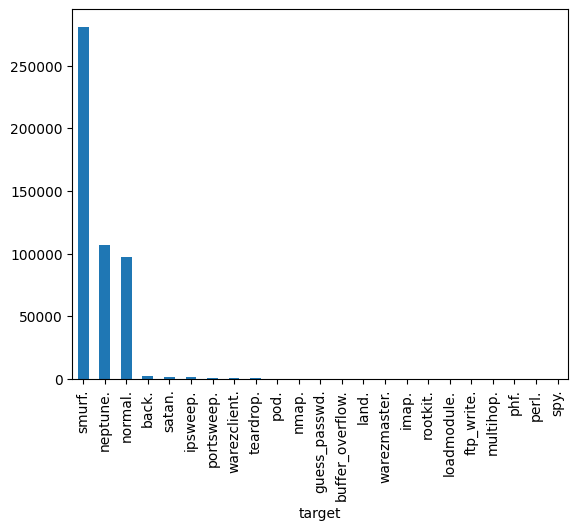

In [13]:
bar_graph('target')


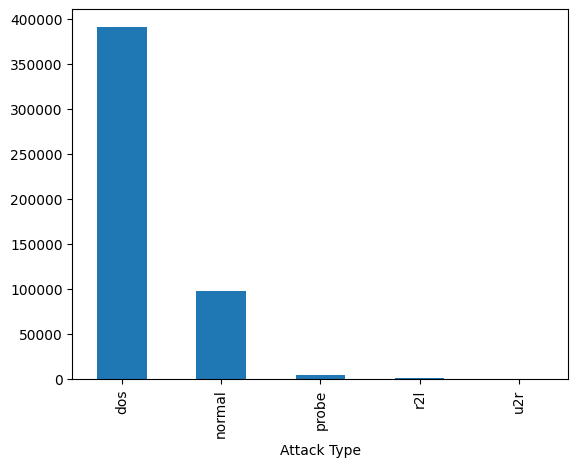

In [14]:
bar_graph('Attack Type')

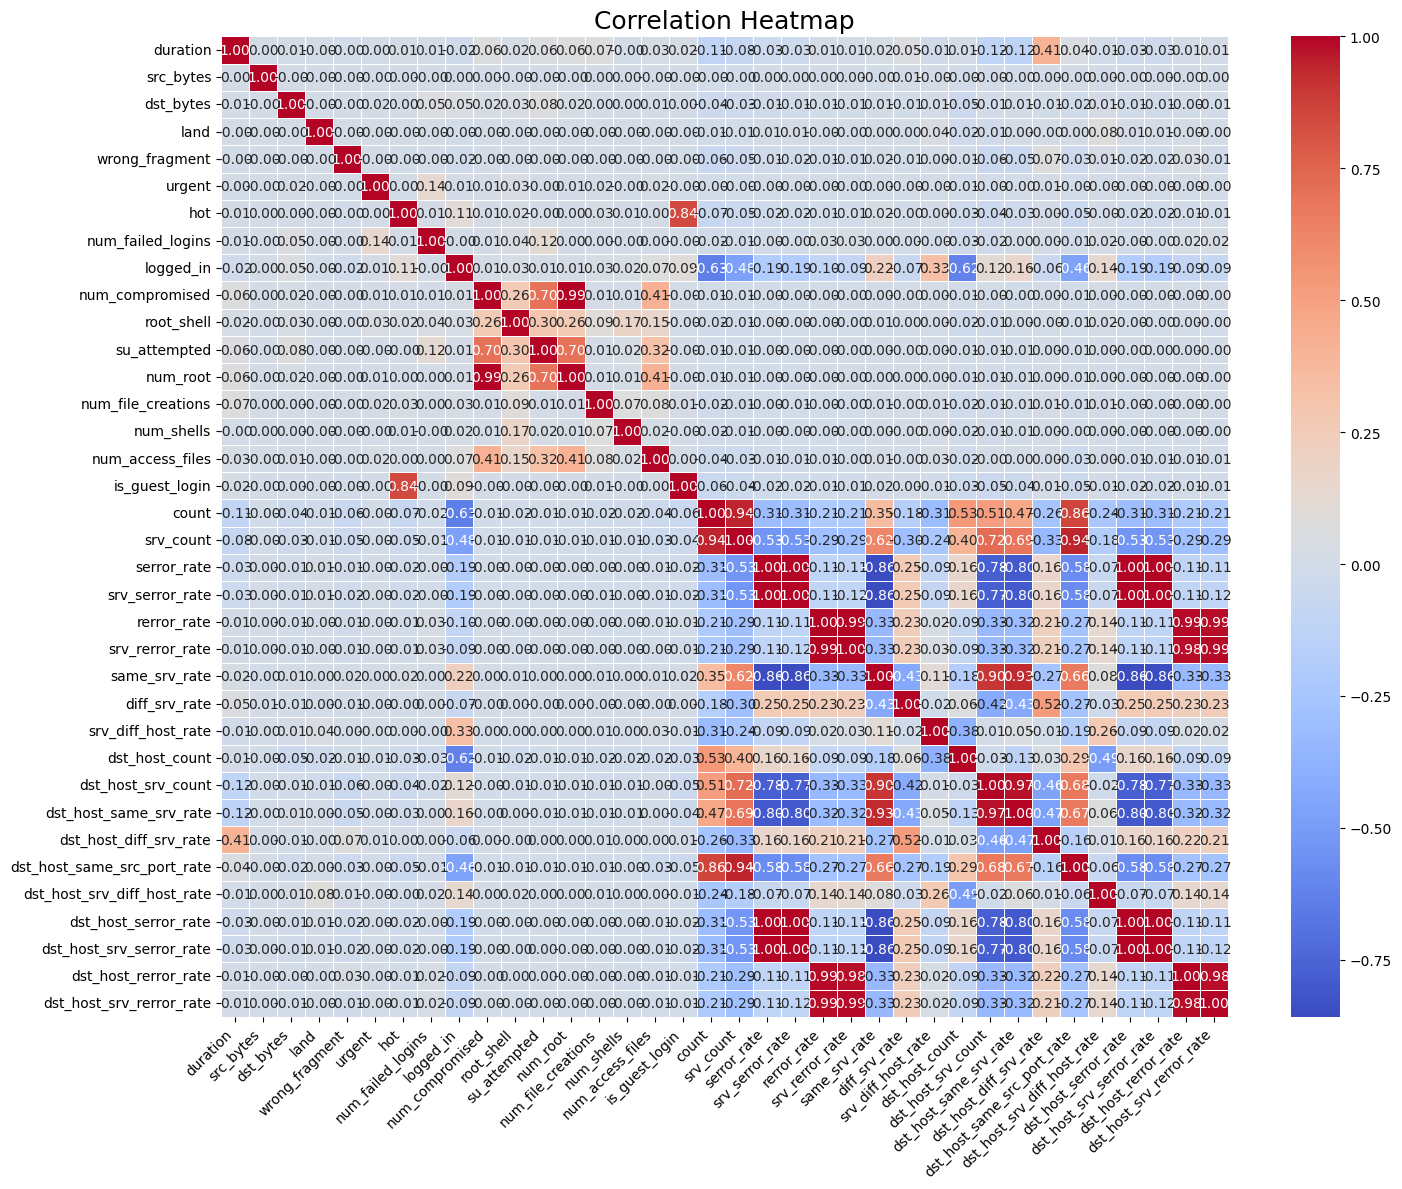

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is already defined and loaded with your data

# Step 1: Drop columns with any NaN values
df = df.dropna(axis=1)

# Step 2: Remove non-numeric columns
# Select only the numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Step 3: Keep columns with more than one unique value
df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

# Step 4: Compute the correlation matrix
corr = df_numeric.corr()

# Step 5: Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()
